### Performing Convolution to an Image
#### Theory
This lab focuses on applying convolution operations to an image using a custom kernel. Convolution is a fundamental operation in image processing and computer vision, used for tasks such as edge detection, sharpening, blurring, and feature extraction. By manipulating the kernel, we can achieve various effects on the image, such as enhancing edges, detecting patterns, or smoothing noise. For example, using a sharpening kernel can highlight fine details, while a Gaussian kernel can blur the image to reduce noise. Experimenting with different kernels allows us to explore how specific features of the image can be emphasized or suppressed.

#### Objectives:
1. Understand the concept of convolution and its role in image processing.
2. Implement a custom convolution function to apply a kernel to an image.
3. Visualize the original image and the result of the convolution operation.
4. Explore the effects of different kernels on the image, such as edge enhancement, noise reduction, or feature extraction.

#### Operations Achievable by Changing the Kernel:
1. **Edge Detection**: Kernels like the Sobel or Prewitt operators can be used to detect edges in the image.
2. **Sharpening**: A sharpening kernel can enhance fine details and make the image appear crisper.
3. **Blurring**: Gaussian or averaging kernels can smooth the image and reduce noise.
4. **Embossing**: Kernels designed for embossing can create a 3D-like effect on the image.
5. **Feature Extraction**: Custom kernels can be designed to detect specific patterns or features in the image.
6. **Noise Reduction**: Smoothing kernels can help in reducing noise while preserving important features.

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def convolution(image, kernel):
    pad = kernel.shape[0] // 2
    padded = np.pad(image, pad, mode="constant")
    output = np.zeros_like(image, dtype=np.float64)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output[i, j] = np.sum(
                kernel * padded[i : i + kernel.shape[0], j : j + kernel.shape[1]]
            )
    return np.clip(output, 0, 255).astype(np.uint8)


image = cv2.imread("stdimgs/HappyFish.jpg", cv2.IMREAD_GRAYSCALE)
kernel = np.array([
    [-1, 1, -1],
    [1, 8, 1],
    [-1, 1, -1]
    ], dtype=np.float64)
convolutioned = convolution(image, kernel)

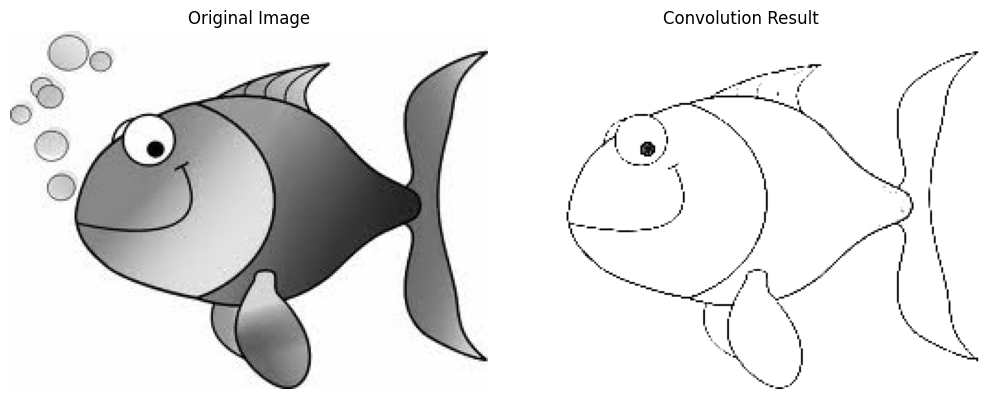

In [30]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(122)
plt.imshow(convolutioned, cmap="gray")
plt.title("Convolution Result")
plt.axis("off")

plt.tight_layout()